# Basic Works

##Importing Lilbraries



In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot, plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from collections import Counter


pd.options.display.float_format = '{:,.3f}'.format

## Load Netflix Data

In [4]:
#Load Netflix Data
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Let's Get Quick information

In [5]:
#Get some quick info
print(f"Number of Rows(Observation): {df.shape[0]}")
print(f"Number of Columns(Features): {df.shape[1]}")

Number of Rows(Observation): 8790
Number of Columns(Features): 10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
df.sample(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
7843,s4299,Movie,Once in a Lifetime Sessions with George Ezra,Not Given,United States,12/15/2018,2018,TV-MA,78 min,"Documentaries, Music & Musicals"
1124,s1148,Movie,Not a Game,Jose Gomez,United Kingdom,3/31/2021,2020,TV-MA,98 min,"Documentaries, International Movies, Sports Mo..."
5190,s7129,Movie,Jewel's Catch One,C. Fitz,United States,5/1/2018,2016,TV-MA,84 min,"Documentaries, LGBTQ Movies"
6715,s666,TV Show,Deadwind,Not Given,Finland,6/19/2021,2020,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas"
770,s625,Movie,Prime Time,Jakub Piątek,Not Given,6/30/2021,2021,TV-MA,92 min,"Dramas, International Movies, Thrillers"
713,s563,Movie,Austin Powers: International Man of Mystery,Jay Roach,United States,7/1/2021,1997,PG-13,90 min,Comedies
7460,s3242,TV Show,Nailed It! Holiday!,Not Given,United States,11/22/2019,2019,TV-PG,2 Seasons,Reality TV
6580,s50,TV Show,Castle and Castle,Not Given,Nigeria,9/15/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas"
3391,s4682,Movie,Spyder,A.R. Murugadoss,India,8/28/2018,2017,TV-14,140 min,"Action & Adventure, International Movies"
5815,s7934,Movie,Santa Claws,Glenn Miller,United States,11/17/2017,2014,TV-PG,86 min,"Children & Family Movies, Comedies"


In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [9]:
#we want to check for Duplicate Id
df["show_id"].duplicated().sum()

0

In [10]:
df.drop(columns="show_id",inplace=True)
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [11]:
#type column
df["type"].value_counts(normalize=1)*100

type
Movie     69.693
TV Show   30.307
Name: proportion, dtype: float64

In [12]:
type_of_show = df["type"].value_counts()

fig = px.bar(data_frame = type_of_show,
             x = type_of_show.index,
             y = type_of_show,
             color = type_of_show.index,
             color_discrete_sequence = ["#222","#E50914"],
             text_auto = True,
             title = "Show Type Frequency",
             labels = {
                 "y" : "Frequency",
                 "index" : "Show Type"
             }
            )

#Custom Format of Numbers
fig.update_traces(insidetextfont = {
    "family" : "consolas",
    "size" : 17,
})

iplot(fig)

In [13]:
#country Column
df["country"].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [14]:
df["country"].nunique()

86

In [15]:
#date_added column
df["date_added"].dtype

dtype('O')

In [16]:
#Coverting the data type from string to DataTime
df["date_added"] = pd.to_datetime(df["date_added"])

In [17]:
df["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-22
4      2021-09-24
          ...    
8785   2017-01-17
8786   2018-09-13
8787   2016-12-15
8788   2018-06-23
8789   2018-06-07
Name: date_added, Length: 8790, dtype: datetime64[ns]

In [18]:
print(f"Oldest Added Date: {df['date_added'].min()}")
print(f"Newest Added Date: {df['date_added'].max()}")

Oldest Added Date: 2008-01-01 00:00:00
Newest Added Date: 2021-09-25 00:00:00


In [19]:
#For release year column
released_year = df["release_year"].value_counts()
released_year

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: count, Length: 74, dtype: int64

In [20]:
fig = px.bar(released_year , x=released_year.index , y=released_year)

iplot(fig)

In [21]:
#For rating column
rating = df['rating'].value_counts()
rating

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [22]:
fig = px.bar(data_frame = rating,
             x = rating,
             y = rating.index,
             color = rating.index,
             text = rating,
             orientation = "h",

             title = "Popularity of Rating",
             labels = {
                 "x" : "Frequency",
                 "rating" : "rating"
             },
             height = 680
             )

fig.update_traces(
    textposition = "outside",
    outsidetextfont = {
        "family": "consolas",
         "size": 13
    }
)

iplot(fig)

In [23]:
#For duration column
df["duration"].value_counts()

duration
1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: count, Length: 220, dtype: int64

**Actually, The Data is Almost Clean.**

#Ask Questions & Get Insights

In [24]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


##What is the most common rating for all kind of Shows?

In [25]:
print("Movies")
df.loc[df["type"] == "Movie", "rating"].value_counts().nlargest(1)

Movies


rating
TV-MA    2062
Name: count, dtype: int64

In [26]:
print("TV Show")
df.loc[df["type"]=="TV Show", "rating"].value_counts().nlargest(1)

TV Show


rating
TV-MA    1143
Name: count, dtype: int64

**Graphical View**

In [27]:
movies = df.loc[df["type"] == "Movie", "rating"].value_counts()
tv_show = df.loc[df["type"] == "TV Show", "rating"].value_counts()

In [28]:
movies_bar = go.Bar(x = movies.index, y = movies, name="Movie")
tv_bar = go.Bar(x = tv_show.index, y = tv_show, name="Tv show")

In [29]:
fig = make_subplots(rows = 1, cols = 2, shared_yaxes = True)
fig.add_trace(movies_bar, row = 1, col = 1)
fig.add_trace(tv_bar, row = 1, col = 2)
fig.update_layout(height=550, width=800, title_text="Rating per show type")
fig.update_xaxes(tickangle=90)
iplot(fig)


##Who are the top 5 directors with Movies and TV Shows?

In [30]:
directors = df["director"].value_counts()[1:6]
directors

director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Name: count, dtype: int64

In [31]:
fig = px.bar(directors,
             y = directors.index,
             x = directors,
             color = directors.index,
             text_auto = True,
             labels = {'director' : 'Directory', 'x' : 'Number of Movie & TV Show'},
             orientation = "h",
             )

fig.update_traces(
    textposition = "outside",
    outsidetextfont = {
        "family": "consolas",
         "size": 15,
    }
)
fig.update_layout(showlegend=False,height=550, width=800, title_text="Top 5 Directors")
iplot(fig)

##What is the number of Movies and TV Shows added to the Netflix platform per each year?

In [32]:
shows_added_via_year = df.groupby(df["date_added"].dt.year)["type"].count()
shows_added_via_year

date_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: type, dtype: int64

In [33]:
fig = px.line(shows_added_via_year, x=shows_added_via_year.index,
              y=shows_added_via_year,
              markers=True, line_shape='linear',
              title='Movies & TV Shows Added via Years',
              width=800,
              height=550,
             labels={"y": "Number of Movies & Tv Shows",
                    "date_added": "Year"})

#Custom Format
fig.update_xaxes(tickvals=shows_added_via_year.index)
fig.update_traces(line=dict(color='darkred'))
fig.update_layout(
    margin=dict(l=40, r=10, t=80, b=20),
)
iplot(fig)

##How many Movies & TV Shows added by each country?

In [34]:
shows_via_country = df.pivot_table(index="country", columns = df["type"], values = "type",
                                   aggfunc="count")\
.fillna(0)\
.sort_values("Movie", ascending = False)

shows_via_country

type,Movie,TV Show
country,,
United States,"2,395.000",845.000
India,976.000,81.000
United Kingdom,387.000,251.000
Not Given,257.000,30.000
Canada,187.000,84.000
...,...,...
Ukraine,0.000,2.000
Cyprus,0.000,1.000
Puerto Rico,0.000,1.000


**We notice that, There is a country we don't know it's name _4th Country_.
So We will not include it in our graph💡**

In [35]:
top_5_country = shows_via_country[shows_via_country.index != "Not Given"].head()
fig = px.bar(top_5_country, barmode="group", text_auto=True,
             color_discrete_sequence=["#141E46", "#F45050"],
            labels={"value":"Counts", "country":"Country", "type":"Show Type"},
            )

#Custom Format of numbers
fig.update_traces(
    textposition = "outside",
    outsidetextfont = {
        "family": "consolas",
         "size": 10,
    }
)

fig.update_layout(
    height=580, width=780,
    title_text="Top 10 Countries",
    legend = {
        "xref":"paper",
        "x": 0.3,
        'y': 1,
        "orientation" : "h"
    },
     margin=dict(l=40, r=10, t=80, b=20),
)

iplot(fig)

##What was the average duration Of added Films (Not TV Shows) per each year ?

In [36]:
filt = df["type"] == "Movie"
df_movies = df[filt].copy()
df_movies.shape

(6126, 9)

In [37]:
#Add Additional Column of Duration Minute
df_movies["duration_in_min"] = df_movies["duration"].str.split(" ", expand=True)[0].astype(int)
df_movies.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_in_min
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125
6,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",104
7,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",87


In [38]:
#Group By Year and Get The Average Of Duration of all Movies and Number of Movies
year_group_by_duration = df_movies.groupby(df["date_added"].dt.year)["duration_in_min"].agg(["count", "mean"]).apply(round)

year_group_by_duration

,count,mean
date_added,,
2008,1,81.000
2009,2,66.000
2010,1,84.000
2011,13,93.000
2012,3,62.000
2013,6,84.000
2014,19,77.000
2015,56,84.000
2016,251,84.000


**We will not graph the first 3 year because it has only 1 or 2 Movies in that year.**

---



In [39]:
fig = px.scatter(year_group_by_duration[3:],
           x = year_group_by_duration[3:].index,
           y = year_group_by_duration[3:]["mean"],
           size=year_group_by_duration[3:]["mean"],
          color_discrete_sequence=["darkred"],
          labels={"x": "Year", "y":"AVG Duration in Minutes"})


#Custom Format
fig.update_layout(height=580, width=780,
                  title_text="Avg Duration (Minutes) of Movies in Period [2014 : 2021]",
                      margin=dict(l=70, r=10, t=80, b=20),
)

fig.update_xaxes(tickvals=year_group_by_duration[3:].index)

iplot(fig)

##what are the top 10 popular categories that Movies & TV Shows listed In?

In [40]:
listed_in = df["listed_in"].str.split(", ")
listed_in.head()


0                                      [Documentaries]
1    [Crime TV Shows, International TV Shows, TV Ac...
2                 [TV Dramas, TV Horror, TV Mysteries]
3                 [Children & Family Movies, Comedies]
4    [Dramas, Independent Movies, International Mov...
Name: listed_in, dtype: object

In [41]:
counter = Counter()
for i in listed_in:
    counter.update(i)

In [42]:
top_10_listed_in = counter.most_common(10)[::-1]

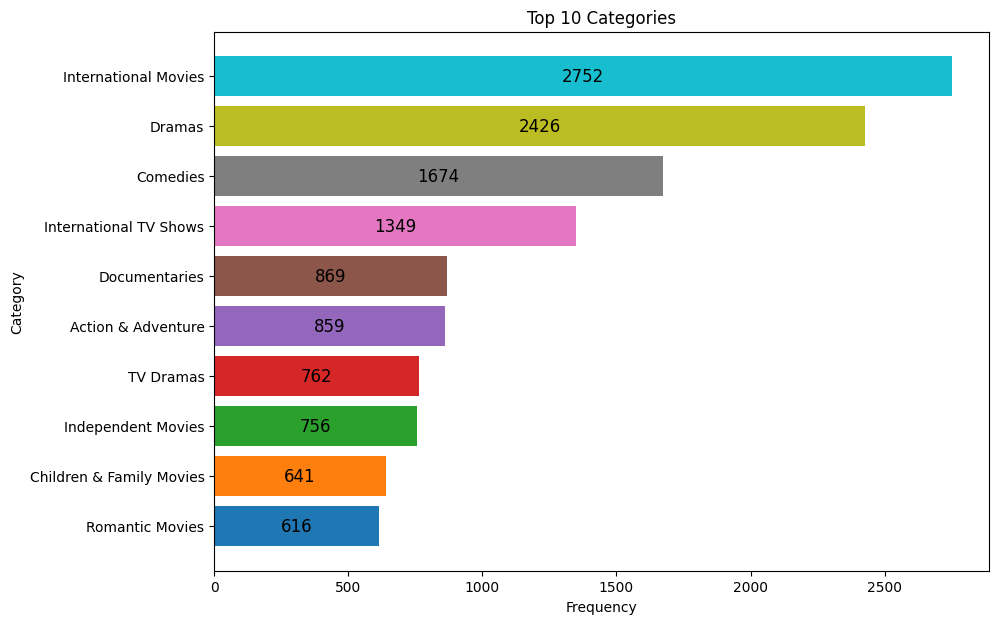

In [43]:
plt.figure(figsize=(10, 7))
for i in top_10_listed_in:
    fig = plt.barh(i[0], i[1])
    plt.bar_label( fig, label_type='center', size="12")

plt.title("Top 10 Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()